33600
29


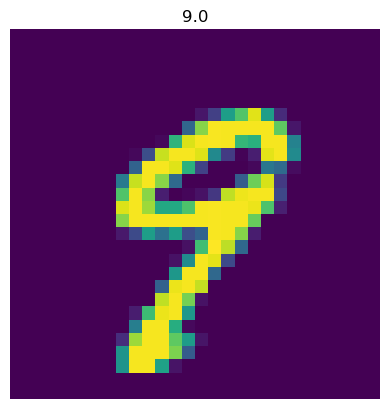

In [1]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Prepare dataset
train = pd.read_csv(r"../../lesson1/input/train.csv", dtype=np.float32)
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
# print(targets_numpy)
# print(train.label)
features_numpy = train.loc[:, train.columns != "label"].values / 255  # normalization
# print(type(features_numpy))
# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42
)
print(len(features_train))
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(
    torch.LongTensor
)  # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)  # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10001
num_epoches = n_iters / (len(features_train) / batch_size)
num_epoches = int(num_epoches)
print(num_epoches)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
print(train)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)
# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# visualize one of the images in data set
plt.imshow(features_numpy[11].reshape(28, 28))
plt.axis("off")
plt.title(str(targets_numpy[11]))
# plt.savefig("graph.png")
plt.show()

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable


class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.elu3 = nn.ELU()
        # Linear function 4: 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.elu3(out)
        # Linear function 4
        out = self.fc4(out)
        return out


input_dim = 28 * 28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
# Training the model
count = 0
loss_list = []
accuracy_list = []
iteration_list = []

for epoch in range(num_epoches):
    for i, (images, labels) in enumerate(train_loader):
        # Define variable
        # print(i, (images, labels))
        # print(len(train_loader))
        train = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        # print(train)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        # Calculate the gradients
        loss.backward()
        # Update parameters
        optimizer.step()

        # Prediction
        count += 1
        if count % 50 == 0:
            # Calculate the Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28))
                # Forward propagation
                outputs = model(test)
                # Get predictions fromthe maximum value
                predicted = torch.max(outputs.data, 1)[1]
                # print(torch.max(outputs.data, 1)[1])
                # Total number of labels
                total += len(labels)

                # Total correct prediction
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            accuracy_list.append(accuracy)
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print(
                "Iteration: {}  Loss: {}  Accuracy: {}%".format(
                    count, loss.data, accuracy
                )
            )

Iteration: 500  Loss: 1.8272441625595093  Accuracy: 61.0476188659668%
Iteration: 1000  Loss: 0.8082588911056519  Accuracy: 80.53571319580078%
Iteration: 1500  Loss: 0.42943236231803894  Accuracy: 84.97618865966797%
Iteration: 2000  Loss: 0.43428924679756165  Accuracy: 87.61904907226562%
Iteration: 2500  Loss: 0.43931037187576294  Accuracy: 89.26190185546875%
Iteration: 3000  Loss: 0.1771029233932495  Accuracy: 89.9047622680664%
Iteration: 3500  Loss: 0.32734283804893494  Accuracy: 90.51190185546875%
Iteration: 4000  Loss: 0.12370596826076508  Accuracy: 91.01190185546875%
Iteration: 4500  Loss: 0.4804483652114868  Accuracy: 91.64286041259766%
Iteration: 5000  Loss: 0.1909221112728119  Accuracy: 91.72618865966797%
Iteration: 5500  Loss: 0.28106391429901123  Accuracy: 92.14286041259766%
Iteration: 6000  Loss: 0.3505535125732422  Accuracy: 92.61904907226562%
Iteration: 6500  Loss: 0.15147089958190918  Accuracy: 93.1547622680664%
Iteration: 7000  Loss: 0.24691689014434814  Accuracy: 93.2738

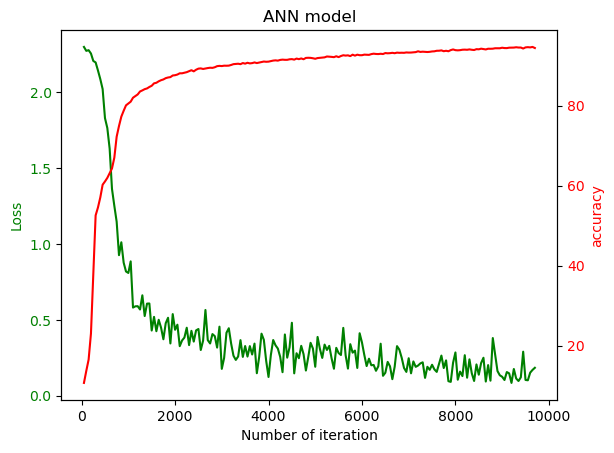

In [12]:
# Create the first plot with y1
fig, ax1 = plt.subplots()
plt.title("ANN model")
# Plot y1 with ax1
ax1.plot(iteration_list, loss_list, "g-")
ax1.set_xlabel("Number of iteration")
ax1.set_ylabel("Loss", color="g")
ax1.tick_params(axis="y", labelcolor="g")

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot y2 with ax2
ax2.plot(iteration_list, accuracy_list, "r-")
ax2.set_ylabel("accuracy", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Optional: Add a legend
# fig.legend(loc="upper left", bbox_to_anchor=(0, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()